# Import libraries

In [1]:
from pathlib import Path
from ultralytics import YOLO
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load model

In [2]:
model = YOLO("runs/detect/train/weights/best_all_dataset.pt")

# Load data

In [3]:
test_list_path = "datasets/SKU-110K/test.txt"
dataset_root = Path("datasets/SKU-110K")
image_paths = [dataset_root / line.strip() for line in open(test_list_path)]
label_paths = [dataset_root / line.strip().replace('images', 'labels') for line in open(test_list_path)]

In [4]:
image_paths[0]

PosixPath('datasets/SKU-110K/images/test_0.jpg')

In [5]:
label_paths[0]

PosixPath('datasets/SKU-110K/labels/test_0.jpg')

# Prediction

In this cell, we will plot the prediction of the image with the bounding boxes.


image 1/1 /home/wildsense/Documents/projects/retail-object-detection/datasets/SKU-110K/images/test_0.jpg: 640x480 141 objects, 28.1ms
Speed: 2.4ms preprocess, 28.1ms inference, 73.9ms postprocess per image at shape (1, 3, 640, 480)


Text(0.5, 1.0, 'Prediction')

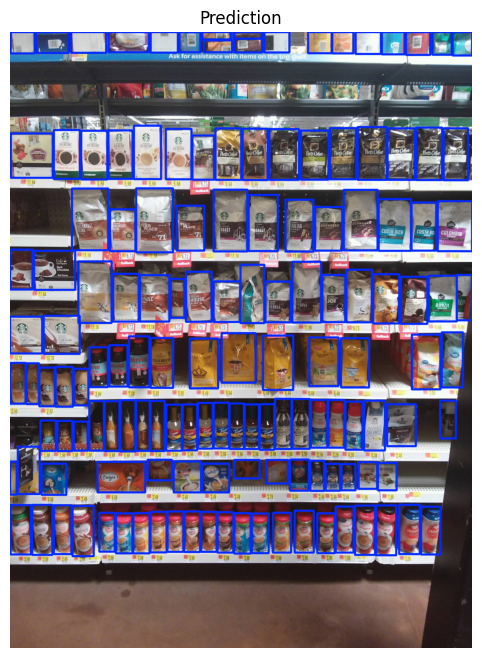

In [6]:
results = model.predict(source=str(image_paths[0]), save=False)

rendered = results[0].plot(labels=False)
img = Image.fromarray(rendered[..., ::-1])

plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.title('Prediction')

# Ground Thruth

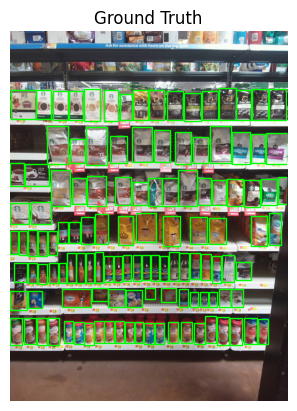

In [7]:
img = Image.open(image_paths[0])
w, h = img.size

label_path = Path("datasets/SKU-110K/labels") / image_paths[0].name.replace(".jpg", ".txt")
with open(label_path, "r") as f:
    labels = [list(map(float, line.strip().split())) for line in f]

fig, ax = plt.subplots()
ax.imshow(img)

for cls, xc, yc, bw, bh in labels:
    x = (xc - bw / 2) * w
    y = (yc - bh / 2) * h
    bw_pix = bw * w
    bh_pix = bh * h
    rect = patches.Rectangle((x, y), bw_pix, bh_pix, linewidth=1, edgecolor='lime', facecolor='none')
    ax.add_patch(rect)

plt.axis('off')
plt.title('Ground Truth')
plt.show()

# Evaluation on Validation Dataset

In [8]:
model.val(data="SKU-110K.yaml")

Ultralytics 8.3.168 🚀 Python-3.10.12 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 4070, 11871MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 7129.4±1570.6 MB/s, size: 875.6 KB)


val: Scanning /home/wildsense/Documents/projects/datasets/datasets/SKU-1K/labels... 588 images, 0 backgrounds, 0 corrupt: 100%|██████████| 588/588 [00:00<00:00, 708.78it/s] 

val: New cache created: /home/wildsense/Documents/projects/datasets/datasets/SKU-1K/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/37 [00:00<?, ?it/s]Corrupt JPEG data: 786 extraneous bytes before marker 0xd9
Corrupt JPEG data: 305 extraneous bytes before marker 0xd9
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 1/37 [00:01<00:36,  1.03s/it]Corrupt JPEG data: 366 extraneous bytes before marker 0xd9
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 16/37 [00:07<00:03,  5.95it/s]Corrupt JPEG data: premature end of data segment
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  70%|███████   | 26/37 [00:08<00:01,  9.54it/s]Corrupt JPEG data: 786 extraneous bytes before marker 0xd9
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  76%|███████▌  | 28/37 [00:09<00:00, 10.13it/s]Corrupt JPEG data: 305 extraneous bytes

                   all        588      90968      0.902      0.832      0.903      0.577
Speed: 0.3ms preprocess, 2.0ms inference, 0.0ms loss, 8.9ms postprocess per image
Results saved to /home/wildsense/Documents/projects/retail-object-detection/runs/detect/val26


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e645e428970>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# Evaluation on Test Dataset

In [9]:
model.val(data="SKU-110K.yaml", split="test")

Ultralytics 8.3.168 🚀 Python-3.10.12 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 4070, 11871MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 7243.6±769.0 MB/s, size: 1709.1 KB)


val: Scanning /home/wildsense/Documents/projects/datasets/datasets/SKU-1K/labels... 2935 images, 0 backgrounds, 1 corrupt: 100%|██████████| 2936/2936 [00:01<00:00, 2086.51it/s]

val: /home/wildsense/Documents/projects/datasets/datasets/SKU-1K/images/test_274.jpg: ignoring corrupt image/label: image file is truncated (14 bytes not processed)
val: New cache created: /home/wildsense/Documents/projects/datasets/datasets/SKU-1K/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▎        | 25/184 [00:07<00:15, 10.53it/s]Corrupt JPEG data: premature end of data segment
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  17%|█▋        | 31/184 [00:08<00:13, 11.74it/s]Corrupt JPEG data: premature end of data segment
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  18%|█▊        | 33/184 [00:08<00:12, 11.91it/s]Corrupt JPEG data: 358 extraneous bytes before marker 0xd9
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  19%|█▉        | 35/184 [00:08<00:12, 12.26it/s]Corrupt JPEG data: 70 extraneous bytes before marker 0xd9
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  21%|██        | 39/184 [00:09<00:11, 12.19it/s]Corrupt JPEG data: premature end of data segment
                 Class     Images  Instances 

                   all       2935     431419      0.902      0.844      0.915      0.585
Speed: 0.2ms preprocess, 1.7ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to /home/wildsense/Documents/projects/retail-object-detection/runs/detect/val27


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e645e12f580>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 